# **Predictive Analytics : Harga Tiket Pesawat**

Oleh : [Muhammad Lailfachry Yusrie](https://github.com/FachryYusrie/Proyek-Machine-Learning-Dicoding-Predictive-Analytics-Prediksi-Harga-Tiket-Pesawat)

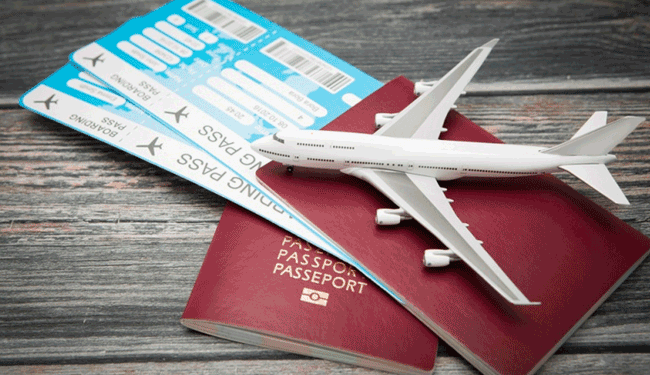

## **Deskripsi Proyek**

**Deskripsi Latar Belakang Proyek Prediksi Harga Tiket Pesawat dengan Machine Learning**

Proyek ini bertujuan untuk mengembangkan model machine learning yang dapat memprediksi harga tiket pesawat dengan lebih akurat dan efisien untuk membantu penumpang merencanakan perjalanan dengan pesawat terbang. Saat ini, penentuan sumber referensi harga tiket pesawat hanya dapat diperoleh dari website resmi maskapai atau travel perjalanan. Namun, terdapat potensi harga tiket pesawat dengan harga yang tidak wajar atau terlalu mahal dari seharusnya. Hal ini menyebabkan kerugian bagi penumpang yang seharusnya bisa mendapatkan harga tiket yang lebih kompetibel. Model prediksi harga tiket pesawat ini dapat membantu penumpang dalam memprediksi harga tiket pesawat yang wajar untuk memberikan solusi perencanaan keuangan dalam perjalanan yang lebih efisien.

## **1. Import Library yang Dibutuhkan**

In [1]:
!pip install -q kaggle

In [2]:
#Import Load data Library
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Import One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
# Import PCA
from sklearn.decomposition import PCA
# Import train test split
from sklearn.model_selection import train_test_split
# Import Minmaxscaler
from sklearn.preprocessing import MinMaxScaler
# Import cross val score
from sklearn.model_selection import cross_val_score
# Import Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# Import matric evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## **2. Data Understanding**

Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut.

### 2.1 Data Loading

Data Loading merupakan tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami.

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fakuri","key":"c32c2f5245cdc385aea689fd4d880162"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d shubhambathwal/flight-price-prediction

Dataset URL: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction
License(s): CC0-1.0
  0% 0.00/4.16M [00:00<?, ?B/s]
100% 4.16M/4.16M [00:00<00:00, 523MB/s]


In [6]:
zip_ref = zipfile.ZipFile('/content/flight-price-prediction.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [7]:
df = pd.read_csv('/content/Clean_Dataset.csv')

### 2.2 Exploratory Data Analysis (EDA)

Exploratory data analysis merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Teknik ini biasanya menggunakan bantuan statistik dan representasi grafis atau visualisasi.

#### 2.2.1 EDA - Deskripsi Variabel

In [8]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Terdapat kolom yang tidak memiliki nama dan memiliki arti yang sama dengan nomor baris, sehingga dapat dihapus dari dataframe.

In [9]:
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])

In [10]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Dari dataframe di atas, terdapat 300153 baris dan 11 kolom, diantaranya:

1) **Airline**: Nama perusahaan penerbangan disimpan di kolom maskapai penerbangan. Ini adalah fitur kategoris yang memiliki 6 maskapai penerbangan yang berbeda.

2) **Flight**: Penerbangan menyimpan informasi mengenai kode penerbangan pesawat. Ini adalah fitur kategoris.

3) **Source City**: Kota tempat penerbangan lepas landas. Ini adalah fitur kategoris yang memiliki 6 kota unik.

4) **Departure** Time: Ini adalah fitur kategoris turunan yang diperoleh dengan mengelompokkan periode waktu ke dalam kelompok. Ini menyimpan informasi tentang waktu keberangkatan dan memiliki 6 label waktu yang unik.

5) **Stops**: Fitur kategoris dengan 3 nilai berbeda yang menyimpan jumlah perhentian antara kota asal dan tujuan.

6) **Arrival Time**: Ini adalah fitur kategoris turunan yang dibuat dengan mengelompokkan interval waktu ke dalam kotak. Fitur ini memiliki enam label waktu yang berbeda dan menyimpan informasi tentang waktu kedatangan.

7) **Destination City**: Kota tempat pesawat akan mendarat. Ini adalah fitur kategoris yang memiliki 6 kota unik.

8) **Class**: Fitur kategoris yang berisi informasi tentang kelas kursi; fitur ini memiliki dua nilai yang berbeda: Bisnis dan Ekonomi.

9) **Duration**: Fitur berkelanjutan yang menampilkan jumlah waktu keseluruhan yang diperlukan untuk bepergian antar kota dalam hitungan jam.

10) **Days Left**: Ini adalah karakteristik turunan yang dihitung dengan mengurangi tanggal perjalanan dengan tanggal pemesanan.

11) **Price**: Variabel target menyimpan informasi tentang harga tiket (dalam kurs India/Rupe).


In [11]:
df = df.drop(columns=['airline', 'flight', 'source_city', 'destination_city'])
df.head()

,departure_time,stops,arrival_time,class,duration,days_left,price
0,Evening,zero,Night,Economy,2.17,1,5953
1,Early_Morning,zero,Morning,Economy,2.33,1,5953
2,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956
3,Morning,zero,Afternoon,Economy,2.25,1,5955
4,Morning,zero,Morning,Economy,2.33,1,5955


Namun, karena tujuan dari prediksi harga tiket pesawat ini bersifat umum atau semua negara bisa menggunakan, maka fitur "Airline", "Flight", "Source City", dan "Destination City" tidak akan digunakan karena data ini spesifik hanya berada di India.

In [12]:
df['price_usd'] = df['price'] * 0.012 # harga tiket pesawat dari kurs India (Rupe) di konversi ke kurs USA (USD)
df = df.drop(columns=['price'])
df.head()

,departure_time,stops,arrival_time,class,duration,days_left,price_usd
0,Evening,zero,Night,Economy,2.17,1,71.436
1,Early_Morning,zero,Morning,Economy,2.33,1,71.436
2,Early_Morning,zero,Early_Morning,Economy,2.17,1,71.472
3,Morning,zero,Afternoon,Economy,2.25,1,71.460
4,Morning,zero,Morning,Economy,2.33,1,71.460


Harga tiket pesawat sebelumnya masih menggunakan mata uang India (Rupe), Oleh karena itu perlu mengonversi harga tiket ke mata uang yang banyak digunakan secara global seperti dolar amerika serikat (USD).

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   departure_time  300153 non-null  object 
 1   stops           300153 non-null  object 
 2   arrival_time    300153 non-null  object 
 3   class           300153 non-null  object 
 4   duration        300153 non-null  float64
 5   days_left       300153 non-null  int64  
 6   price_usd       300153 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 16.0+ MB


Hasil eksekusi df.info() didapatkan infromasi bahwa:
- Terdapat 3 kolom numerikal: duration, days_left, price.
- Terdapat 4 kolom kategorikal: departure_time, stops, arrival_time.

In [14]:
df.shape

(300153, 7)

Setelah membuat fitur yang tidak diperlukan, didapatkan dataframe dengan 300153 baris dan 7 kolom.

In [15]:
df.describe()

,duration,days_left,price_usd
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,250.675926
std,7.191997,13.561004,272.373208
min,0.830000,1.000000,13.260000
25%,6.830000,15.000000,57.396000
50%,11.250000,26.000000,89.100000
75%,16.170000,38.000000,510.252000
max,49.830000,49.000000,1476.852000


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

#### 2.2.2 EDA - Menangani Missing Value dan Outliers

In [16]:
df.isnull().sum()

,0
departure_time,0
stops,0
arrival_time,0
class,0
duration,0
days_left,0
price_usd,0


Terlihat bahwa tidak ada missing value pada data.

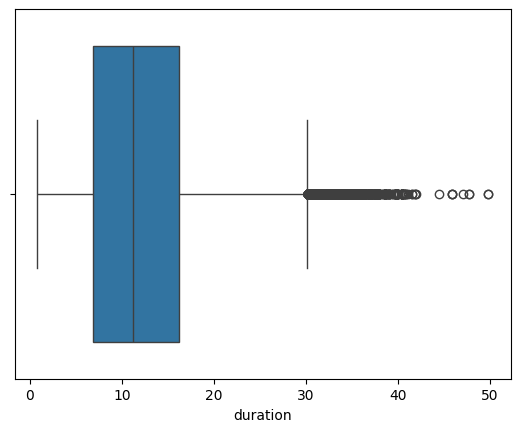

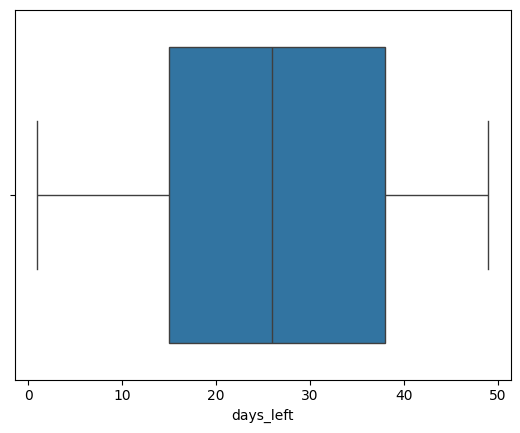

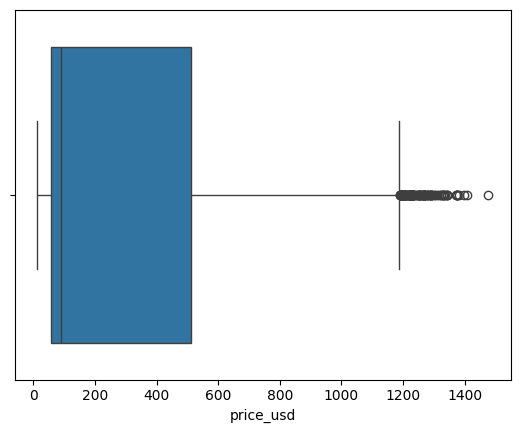

In [17]:
df_outlier=df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure()
        sns.boxplot(data=df_outlier, x=column)

Pada kasus ini, kita akan mendeteksi outliers dengan teknik visualisasi data (boxplot). Kemudian, menangani outliers dengan teknik IQR method.

```
IQR = Inter Quartile Range
IQR = Q3 - Q1
```

In [18]:
# Ambil hanya kolom numerikal
numeric_cols = df.select_dtypes(include='number').columns
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
df = df[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
df.shape

(297920, 7)

#### 2.2.3 EDA - Univariate Analysis

In [19]:
numerical_columns = ['duration', 'days_left', 'price_usd']
categorical_columns = ['departure_time', 'stops', 'arrival_time', 'class']

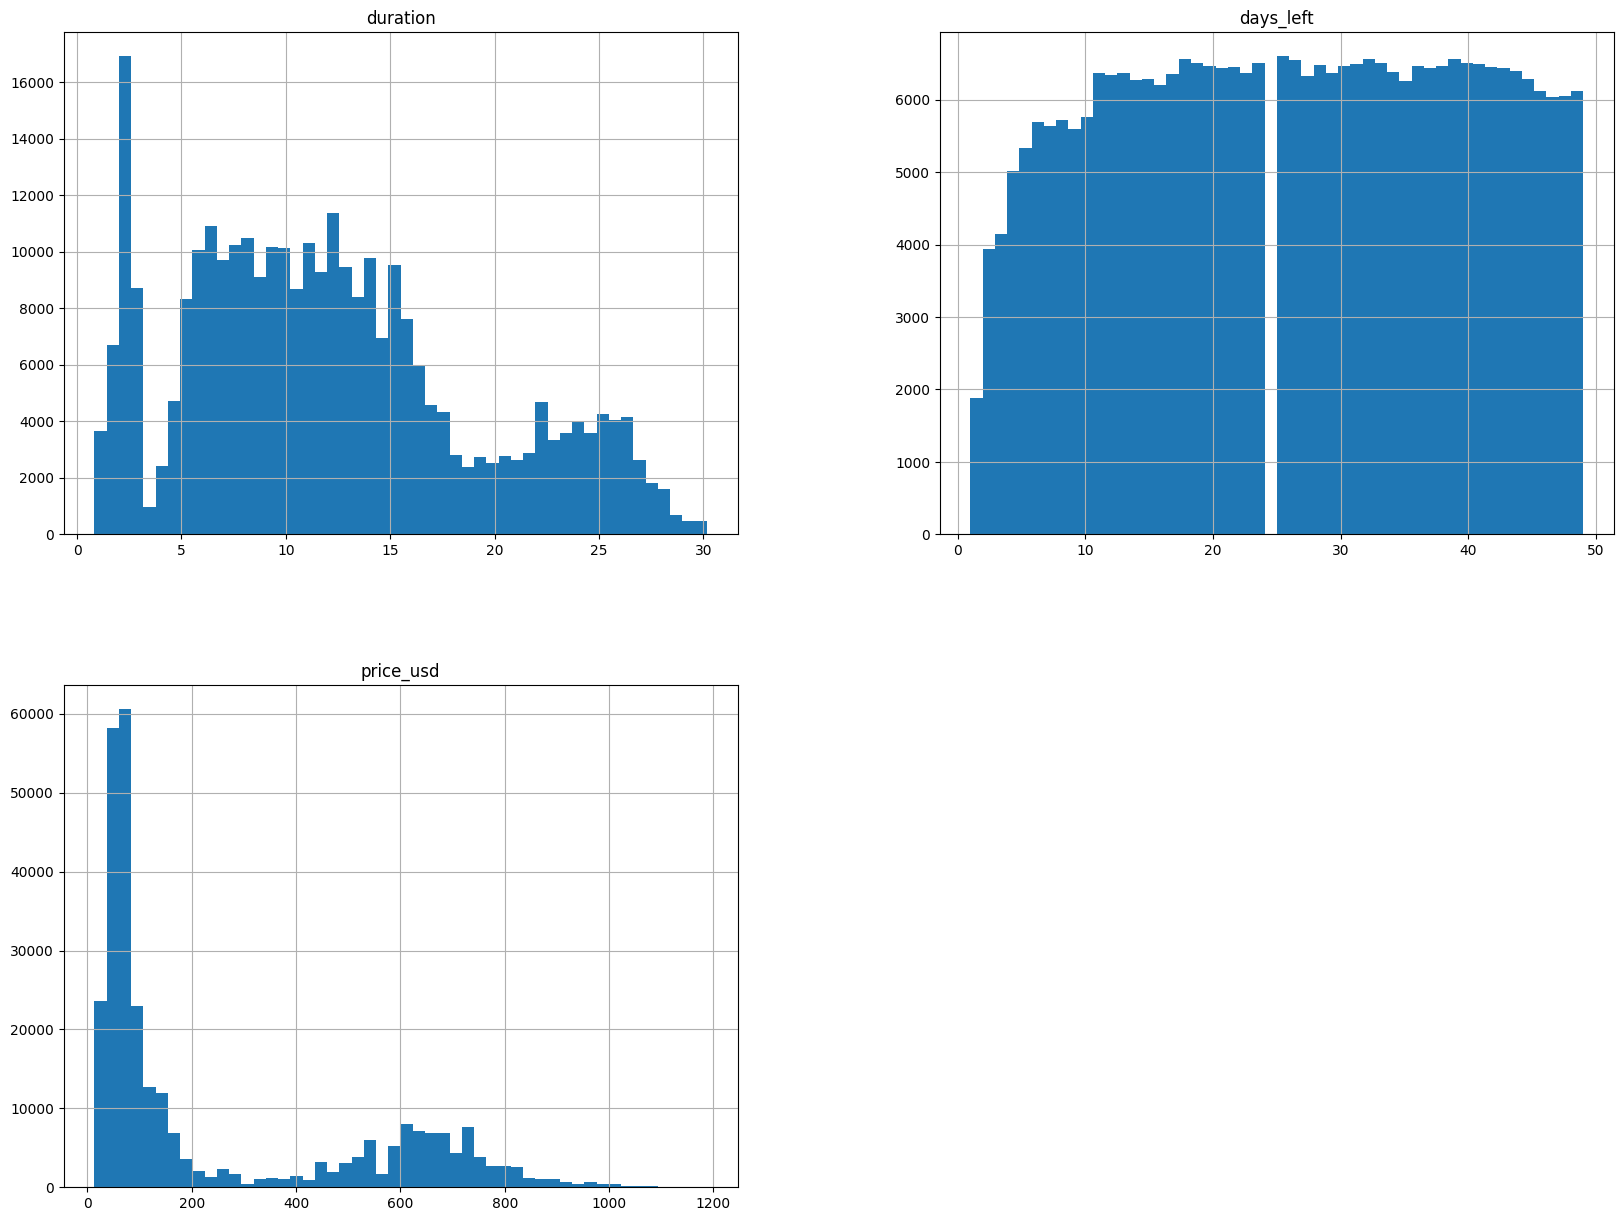

In [20]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Analisis Setiap Fitur: departure_time
                jumlah sampel  persentase
departure_time                           
Morning                 70372        23.6
Early_Morning           66189        22.2
Evening                 64955        21.8
Night                   47998        16.1
Afternoon               47100        15.8
Late_Night               1306         0.4


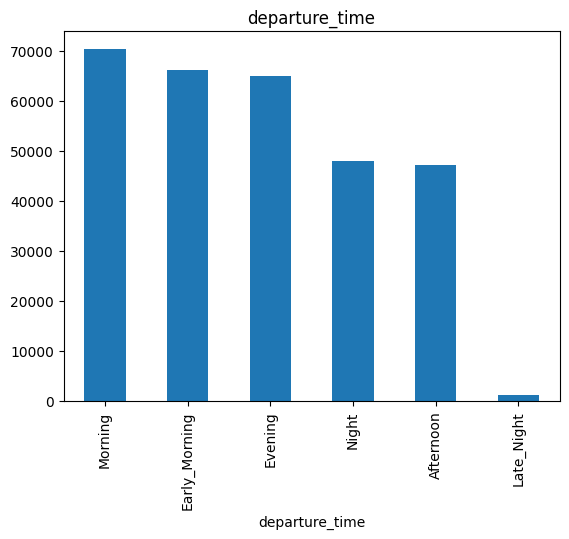

Analisis Setiap Fitur: stops
             jumlah sampel  persentase
stops                                 
one                 249478        83.7
zero                 36004        12.1
two_or_more          12438         4.2


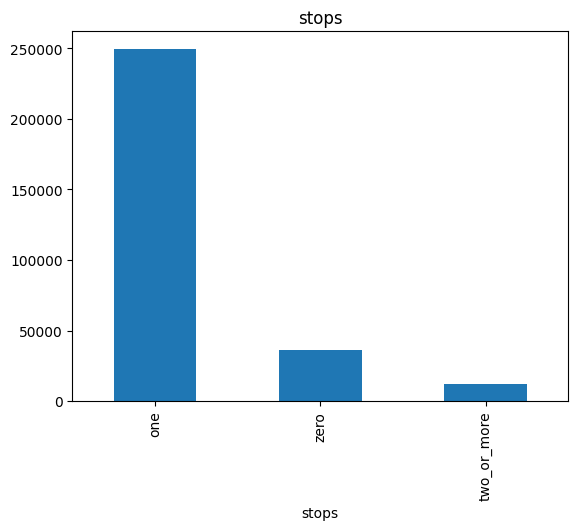

Analisis Setiap Fitur: arrival_time
               jumlah sampel  persentase
arrival_time                            
Night                  90702        30.4
Evening                77217        25.9
Morning                62708        21.0
Afternoon              37938        12.7
Early_Morning          15367         5.2
Late_Night             13988         4.7


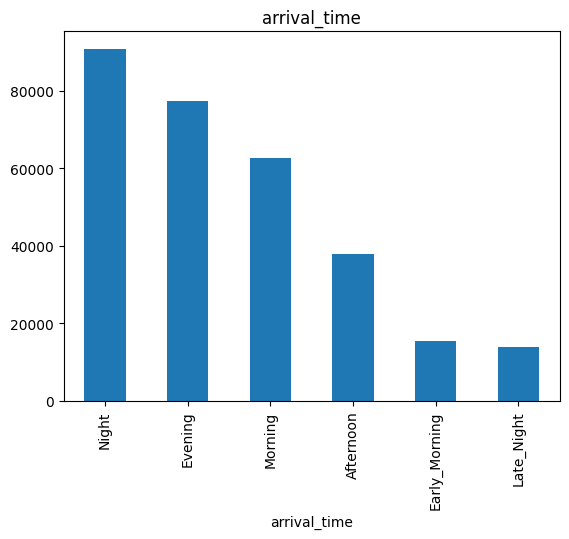

Analisis Setiap Fitur: class
          jumlah sampel  persentase
class                              
Economy          204792        68.7
Business          93128        31.3


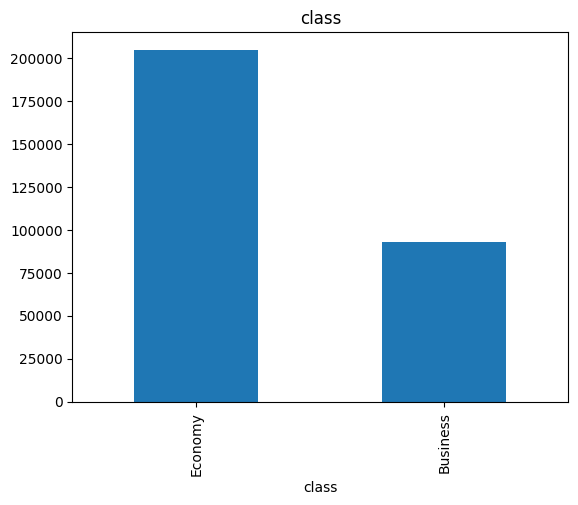

In [21]:
for feature in categorical_columns:
    count = df[feature].value_counts()
    percent = 100*df[feature].value_counts(normalize=True)
    temp_df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
    print(f"Analisis Setiap Fitur: {feature}")
    print(temp_df)
    count.plot(kind='bar', title=feature)
    plt.show()

#### 2.2.4 EDA - Multivariate Analysis

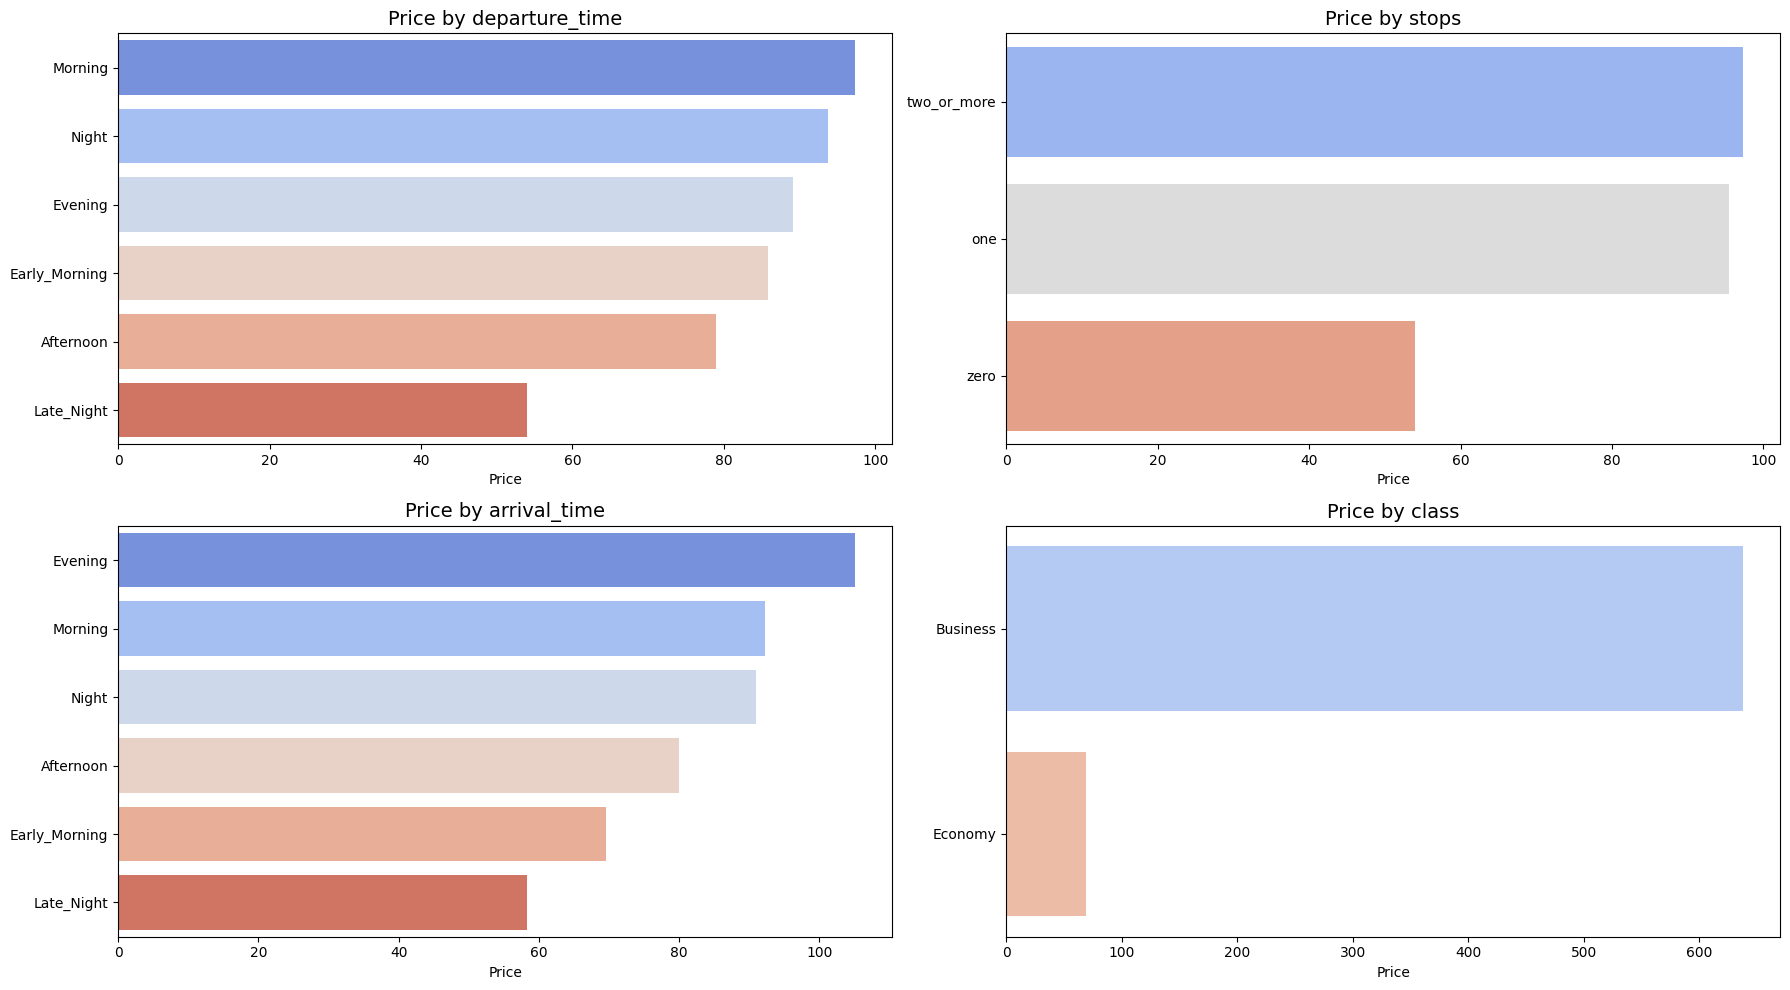

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,10))
ax = ax.flatten()

for i, bar in enumerate(categorical_columns):
    flight_fare = df.groupby(bar)['price_usd'].median().reset_index()
    sorted_categories = flight_fare.sort_values(by = 'price_usd', ascending=False)

    sns.barplot(data=sorted_categories,
                y = bar,
                x ='price_usd',
                palette = 'coolwarm',
                ax = ax[i])

    ax[i].set_title(f'Price by {bar}', fontsize=14)
    ax[i].set_xlabel('Price')
    ax[i].set_ylabel('')

plt.tight_layout()
plt.show()

Dari analisis multivariate untuk fitur kategori terhadap harga tiket didapatkan:

- **Price by Class**: Harga tiket kelas bisnis secara signifikan lebih tinggi dibandingkan kelas ekonomi. Harga tiket kelas ekonomi lebih terjangkau, sehingga menjadi pilihan yang populer bagi sebagian besar penumpang.
- **Price by Total Stops**: Penerbangan dengan jumlah stop >= 2 cenderung lebih mahal dibandingkan penerbangan non-stop. Temuan ini cukup menarik karena biasanya penerbangan nonstop akan cenderung lebih pricey. Hal ini mungkin dapat disebabkan karena mayoritas penerbangan nonstop adalah penerbangan jarak dekat yang memiliki harga tiket lebih rendah.
- **Price by Departure dan Arrival Time**: Harga tiket pesawat untuk penerbangan atau kedatangan tengah malam cenderung lebih murah dibandingkan waktu lainnya.

<ipython-input-23-1951684714>:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


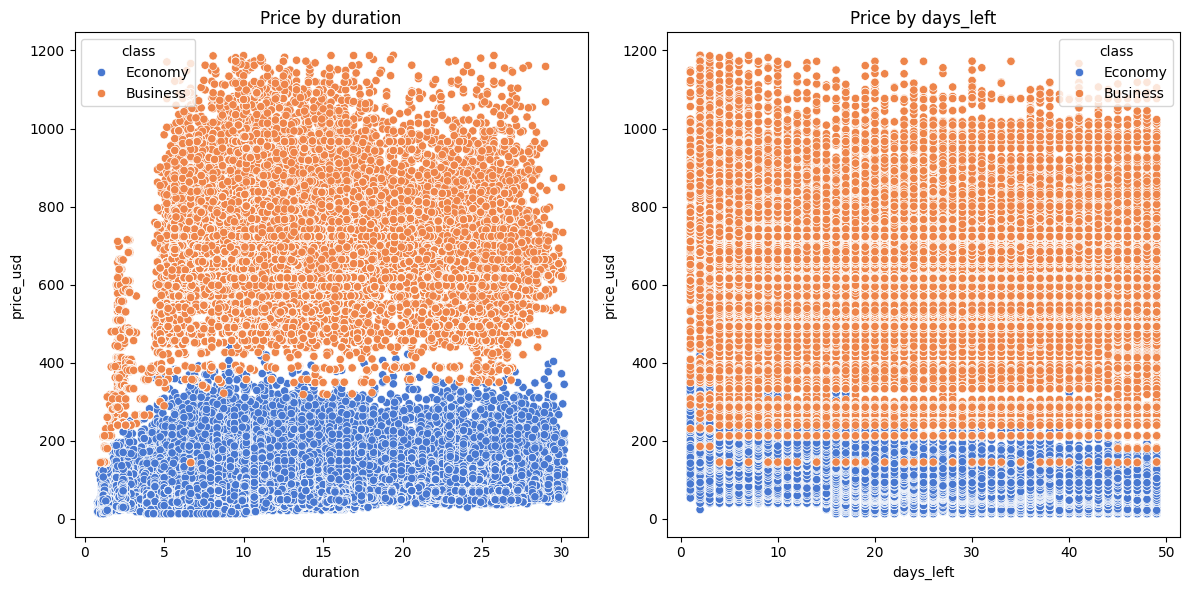

In [23]:
cols = ['duration', 'days_left']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for i in range(len(cols)):
    sns.scatterplot(data = df,
                    x = cols[i],
                    y = 'price_usd',
                    hue = 'class',
                    ax = ax[i],
                    palette = 'muted')
    ax[i].set_title(f'Price by {cols[i]}')
    ax[i].set_xlabel(cols[i])

plt.tight_layout()
plt.show()

Dari analisis multivariate untuk fitur numerikal terhadap harga tiket untuk kelas ekonomi dan bisnis didapatkan:

**Price by Duration:**

Kelas Bisnis memiliki kisaran harga yang jauh lebih tinggi dibandingkan dengan Kelas Ekonomi untuk hampir semua durasi penerbangan.
Umumnya, harga untuk Kelas Ekonomi di bawah 400 USD, sedangkan Kelas Bisnis bisa mencapai harga di atas 1200 USD.
Durasi penerbangan yang lebih lama tidak selalu berkorelasi langsung dengan harga yang lebih tinggi. Meskipun harga cenderung lebih tinggi untuk penerbangan yang lebih lama, terbukti bahwa harga tertinggi sedikit menurun untuk beberapa durasi yang sangat lama, terutama di Kelas Bisnis. Hal ini menunjukkan bahwa faktor selain durasi, seperti permintaan atau rute tertentu, juga dapat memengaruhi dinamika harga untuk penerbangan yang lebih lama.

**Price by Days Left:**

Tidak ada korelasi yang kuat antara harga tiket dan jumlah hari yang tersisa sebelum penerbangan, baik untuk Kelas Bisnis maupun Kelas Ekonomi. Oleh karena itu, tidak dapat diasumsikan bahwa membeli tiket lebih awal akan menghasilkan harga yang lebih murah.
Namun, ada tren yang menunjukkan bahwa harga tiket cenderung naik sedikit ketika mendekati tanggal keberangkatan, meskipun harga tetap cukup bervariasi secara keseluruhan. Hal ini menunjukkan bahwa meskipun membeli tiket di menit-menit terakhir tidak selalu menghasilkan harga yang lebih tinggi secara signifikan, harga tiket dapat berfluktuasi berdasarkan permintaan dan ketersediaan.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

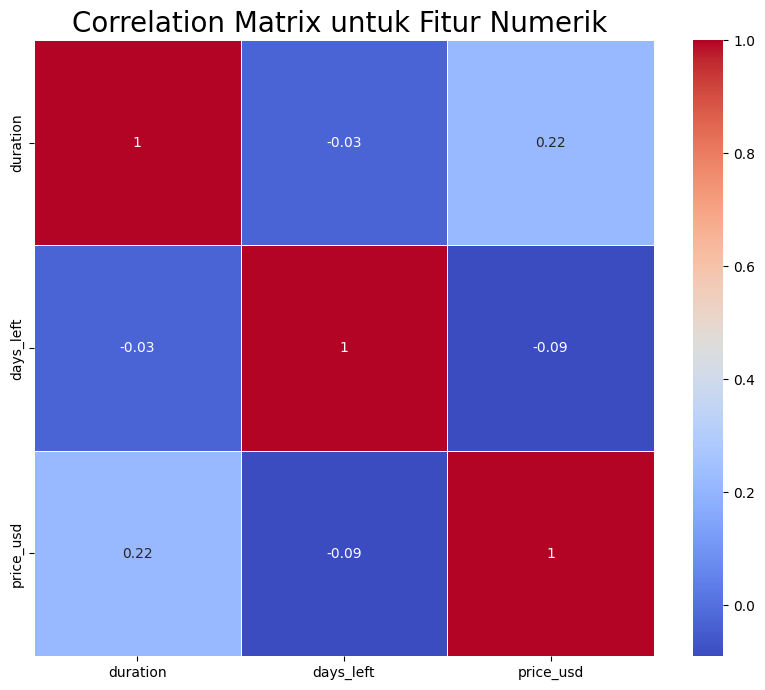

In [24]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## **3. Data Preparation**

Data Preparation merupakan tahap untuk mempersiapkan data sebelum masuk ke tahap pembuatan model Machine Learning.

### 3.1 Encoding Fitur Kategorikal

In [25]:
df = pd.concat([df, pd.get_dummies(df['departure_time'], prefix='departure_time')],axis=1)
df = pd.concat([df, pd.get_dummies(df['stops'], prefix='stops')],axis=1)
df = pd.concat([df, pd.get_dummies(df['arrival_time'], prefix='arrival_time')],axis=1)
df = pd.concat([df, pd.get_dummies(df['class'], prefix='class')],axis=1)
df.drop(['departure_time','stops','arrival_time', 'class'], axis=1, inplace=True)
# Select multiple columns using a list
df_temp = df[['duration', 'price_usd']]
# Convert all columns except 'duration' and 'price_usd' to int
columns_to_convert = df.columns.difference(['duration', 'price_usd'])
df[columns_to_convert] = df[columns_to_convert].astype(int)
df['duration'] = df_temp['duration']
df['price_usd'] = df_temp['price_usd']
df.head()

,duration,days_left,price_usd,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy
0,2.17,1,71.436,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,2.33,1,71.436,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,2.17,1,71.472,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,2.25,1,71.460,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
4,2.33,1,71.460,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


### 3.2 Train Test Split

In [26]:
X = df.drop(["price_usd"],axis =1)
y = df["price_usd"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 297920
Total # of sample in train dataset: 268128
Total # of sample in test dataset: 29792


### 3.3 Normalisasi

In [27]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
df.head()

,duration,days_left,price_usd,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy
0,2.17,1,71.436,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,2.33,1,71.436,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,2.17,1,71.472,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,2.25,1,71.460,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
4,2.33,1,71.460,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


## **4. Model Development**

Dalam analisis ini, digunakan beberapa model regresi yang relevan, termasuk Linear Regression, Random Forest, dan XGBoost, untuk membandingkan performa dan akurasi masing-masing model.

- **Linear Regression** dipilih karena simple dan interpretable dalam menjelaskan hubungan antara fitur dan target.
- **Random Forest**, sebagai model ensemble, membantu dalam menangani non-linearitas dan interaksi antar fitur dengan memberikan prediksi yang lebih stabil.
- **XGBoost** dikenal sebagai algoritma boosting yang efisien dan sangat efektif dalam menangani data besar dan kompleks, serta dapat meningkatkan akurasi model.

### 4.1 Baseline Model

Karena target variabel yang dianalisis adalah numerik kontinu, rata-rata digunakan sebagai baseline model. Dengan membandingkan hasil prediksi model dengan nilai rata-rata dari data, dapat diukur seberapa baik model yang dibangun mampu menjelaskan variasi dalam data dan memberikan prediksi yang lebih akurat daripada sekadar menggunakan rata-rata.

In [29]:
y_pred_baseline = np.mean(y_train)
print(f'Baseline prediction: {y_pred_baseline:.3f}')

Baseline prediction: 250.445


In [30]:
def root_mean_square_error(y_true, y_pred):
    """
    Calculate the root mean square error (RMSE) between true and predicted values.

    Parameters
    ----------
    y_true : array-like
        True target values.

    y_pred : array-like
        Predicted values from the model.

    Returns
    -------
    rmse : float
        The root mean square error, representing the standard deviation of the prediction errors.
    """
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

In [31]:
rmse_baseline_train = root_mean_square_error(y_true = y_train,
                                             y_pred = np.ones(len(y_train)) * y_pred_baseline)

print(f'RMSE Baseline on training set: {rmse_baseline_train}')

RMSE Baseline on training set: 271.9329110197375


Didapatkan bahwa RMSE Baseline dari training set yang ada tanpa pelatihan model sebelumnya yaitu 271.93

### 4.2 Model Training dan Evaluation

In [32]:
def fit_model(model, X_train, y_train):
    """
    Fit the given model to the training data, calculate training and cross-validation
    RMSE, and compute the R² score.

    Parameters
    ----------
    model : estimator object
        The machine learning model to be trained.

    X_train : array-like, shape (n_samples, n_features)
        Training data features.

    y_train : array-like, shape (n_samples,)
        Target values for the training data.

    Returns
    -------
    model : estimator object
        The trained model.

    metrics : pandas DataFrame
        DataFrame containing RMSE for training, RMSE for cross-validation,
        and R² score.
    """
    # fitting the model
    model.fit(X_train, y_train)

    # predict the model
    y_pred_train = model.predict(X_train)
    train_rmse = root_mean_square_error(y_true = y_train,
                                         y_pred = y_pred_train)

    # cross validation
    valid_score = cross_val_score(estimator = model,
                                  X = X_train,
                                  y = y_train,
                                  cv = 5,
                                  scoring = 'neg_mean_squared_error')
    cv_rmse = np.sqrt(-np.mean(valid_score))

    # calculate r2 score
    train_r2 = r2_score(y_train, y_pred_train)

    # store metrics
    metrics = pd.DataFrame({
        'Metrics' : ['RMSE Train', 'RMSE CV', 'R2 Score'],
        'Score' : [train_rmse, cv_rmse, train_r2]
    })

    return model, metrics

#### 4.2.1 Linear Regression

In [33]:
model_lr, metrics_lr = fit_model(model = LinearRegression(),
                                 X_train = X_train,
                                 y_train = y_train)

metrics_lr

,Metrics,Score
0,RMSE Train,84.230744
1,RMSE CV,84.236595
2,R2 Score,0.904056


- RMSE pada training set dengan Linear Regression adalah 84.2307, dan RMSE pada cross-validation set adalah 84.2366, yang menunjukkan konsistensi model dalam memprediksi data.
- R2 score sebesar 0.9041 menunjukkan bahwa sekitar 90% variabilitas dalam data target dapat dijelaskan oleh fitur-fitur dalam model.
- Sebagai perbandingan, baseline model memiliki RMSE sebesar 271.93, yang berarti model Linear Regression jauh lebih akurat dalam memprediksi dibandingkan baseline.

#### 4.2.2 Random Forest

In [34]:
model_rf, metrics_rf = fit_model(model = RandomForestRegressor(n_estimators=50, random_state=123),
                                 X_train = X_train,
                                 y_train = y_train)
metrics_rf

,Metrics,Score
0,RMSE Train,45.982051
1,RMSE CV,67.913056
2,R2 Score,0.971407


- RMSE pada training set adalah 45.98, yang mengindikasikan bahwa model dapat memprediksi dengan akurasi tinggi pada data pelatihan.
- Namun, RMSE pada cross-validation (CV) set adalah 67.91, menunjukkan bahwa meskipun model menunjukkan performa yang baik pada training set, ada penurunan akurasi saat diujikan pada data yang tidak terlihat.
- R2 Score sebesar 0.9714 menunjukkan bahwa sekitar 97.14% variabilitas dalam data target dapat dijelaskan oleh model, namun penting untuk mengevaluasi lebih lanjut untuk memastikan bahwa model tidak overfit.

#### 4.2.3 XGBoost

In [35]:
model_xgb, metrics_xgb = fit_model(model = XGBRegressor(objective='reg:squarederror', random_state = 123),
                                   X_train = X_train,
                                   y_train = y_train)
metrics_xgb

,Metrics,Score
0,RMSE Train,58.431482
1,RMSE CV,59.637176
2,R2 Score,0.953829


- RMSE pada training set adalah 58.43, sedangkan RMSE pada CV set adalah 59.64, menunjukkan bahwa meskipun ada sedikit peningkatan error, model tetap mampu memberikan prediksi yang relevan.
- R2 Score sebesar 0.9538 menunjukkan bahwa sekitar 95.38% variabilitas dalam data target dapat dijelaskan oleh model, menandakan bahwa model ini efektif dalam menangkap hubungan antara fitur dan target.

#### 4.2.4 Perbandingan

In [36]:
# create a dictionary to store the model evaluation metrics
model_results = {
    'Linear Regression': {
        'RMSE Train': 84.230744,
        'RMSE CV': 84.236595,
        'R2 Score': 0.904056
    },
    'Random Forest': {
        'RMSE Train': 45.982051,
        'RMSE CV': 67.913056,
        'R2 Score': 0.971407
    },
    'XGBoost': {
        'RMSE Train': 58.431482,
        'RMSE CV': 59.637176,
        'R2 Score': 0.953829
    }}

# convert the model results dictionary into a pandas DataFrame
df_results = pd.DataFrame(model_results).T
df_results = df_results.reset_index().rename(columns={'index': 'Model'})
df_results

,Model,RMSE Train,RMSE CV,R2 Score
0,Linear Regression,84.230744,84.236595,0.904056
1,Random Forest,45.982051,67.913056,0.971407
2,XGBoost,58.431482,59.637176,0.953829


Berdasarkan hasil ini, diputuskan untuk melakukan hyperparameter tuning pada model **Random Forest**, mengingat model ini memiliki R2 Score tertinggi.

### 4.3 Hyperparameter Tunning

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definisikan parameter distribution
param_dist = {
    'n_estimators' : randint(100, 300),
    'max_depth' : [None, 10, 20, 30, 40, 50],
    'min_samples_split' : randint(2, 11),
    'min_samples_leaf' : randint(1, 5),
    'max_features' : [1.0, 'auto', 'sqrt']
}

# Inisiasi Random Forest Regressor
model_rf = RandomForestRegressor(random_state=123, n_jobs = -1)

# Inisiasi RandomizedSearchCV dengan parameter distribution yang telah didefinisikan
random_search = RandomizedSearchCV(estimator = model_rf,
                                   param_distributions = param_dist,
                                   n_iter = 2,
                                   cv = 3,
                                   scoring = 'neg_mean_squared_error',
                                   verbose = 2,
                                   random_state = 123,
                                   n_jobs = -1)

# Latih RandomizedSearchCV model
random_search.fit(X_train, y_train)

# Ambil estimator terbaik yang ditemukan selama pencarian
best_regressor = random_search.best_estimator_
best_regressor

Fitting 3 folds for each of 2 candidates, totalling 6 fits


RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=8, n_estimators=196, n_jobs=-1,
                      random_state=123)

In [38]:
model_best, metrics_best = fit_model(model = best_regressor,
                                     X_train = X_train,
                                     y_train = y_train)
metrics_best

,Metrics,Score
0,RMSE Train,52.714566
1,RMSE CV,61.470839
2,R2 Score,0.962422


- Setelah melakukan hyperparameter tuning pada model Random Forest, RMSE pada training set kini mencapai 52.72, sementara RMSE pada CV set adalah 61.47.
- R2 Score menurun menjadi 0.9624, namun RMSE pada trainning set mengalami peneurunan performa dibandingkan model random forest sebelum di tunning dan RMSE pada CV mengalami peningkatan performa dibandingkan sebelumnya.
- Hal ini mengindikasikan bahwa meskipun mengalami penurunan performa, potensi terjadinya overvitting telah berkurang dari hasil hyperparameter tunning dan random forest tetap menajdi model terbaik berdasarkan R2 Score yang didapatkan.

### 4.4 Testing

In [39]:
# predict data test with best model
y_pred_test = best_regressor.predict(X_test)
test_rmse = root_mean_square_error(y_true = y_test,
                                   y_pred = y_pred_test)

# calculate r2 score
test_r2 = r2_score(y_test, y_pred_test)

print(f'RMSE Test set: {round(test_rmse, 2)}')
print(f'R2 Score Test set: {round(test_r2, 2) * 100}%')

RMSE Test set: 61.27
R2 Score Test set: 95.0%


Text(0.5, 1.0, 'Prediction vs Actual Harga Tiket')

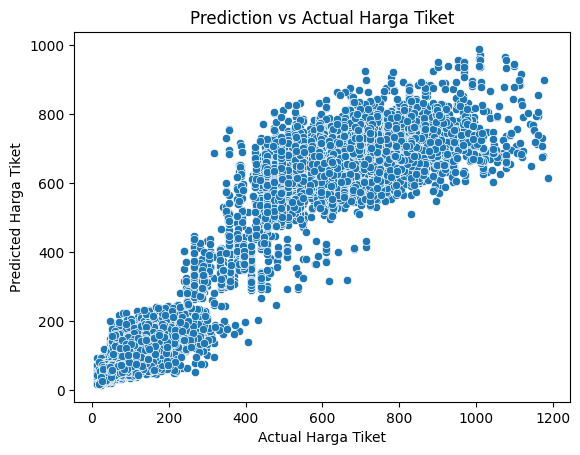

In [40]:
# create a scatter plot to compare actual and predicted flight fares
sns.scatterplot(x = y_test, y = y_pred_test)
plt.xlabel('Actual Harga Tiket')
plt.ylabel('Predicted Harga Tiket')
plt.title('Prediction vs Actual Harga Tiket')